In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [2]:
df_ = pd.read_csv("VariableDescription.csv")
df_.head(50)                    

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [3]:
print(df_.iloc[3]['Description'])

is the building a residential building or not


In [4]:
dfggg = pd.read_csv("SampleSubmission.csv")
dfggg

,Customer Id,Claim
0,H0,1
1,H10000,1
2,H10001,1
3,H10002,1
4,H10003,1
...,...,...
3063,H9987,1
3064,H9988,1
3065,H9994,1
3066,H9996,1


In [5]:
df = pd.read_csv("train_data.csv")
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [6]:
print(f"there are {df['Customer Id'].nunique()} Policy holders")

there are 7160 Policy holders


In [7]:
print(df.columns)

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')


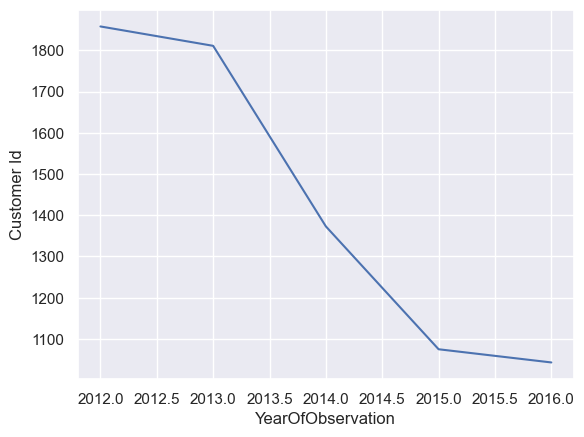

In [8]:
dfp = df.groupby("YearOfObservation")['Customer Id'].nunique().reset_index()

sns.lineplot(dfp, x="YearOfObservation", y = "Customer Id");

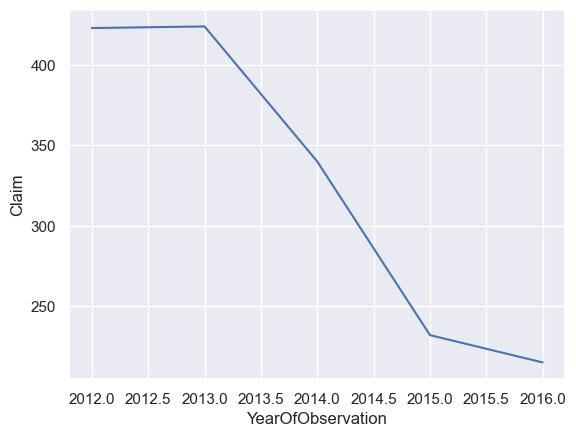

In [9]:
df_person_house = df.groupby("YearOfObservation")["Claim"].sum().reset_index()
df_person_house
sns.lineplot(df_person_house, x="YearOfObservation", y = "Claim");

In [10]:
df_person_house

,YearOfObservation,Claim
0,2012,423
1,2013,424
2,2014,340
3,2015,232
4,2016,215


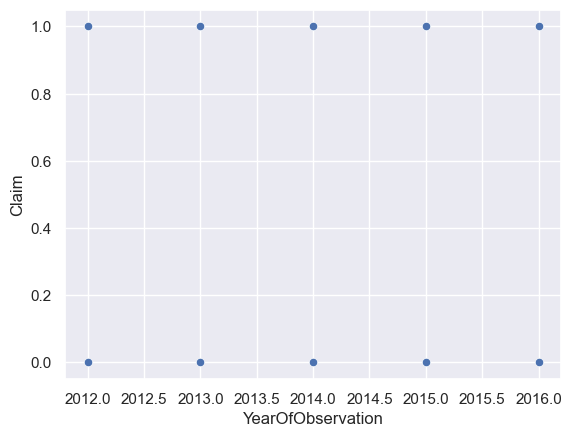

In [11]:
sns.scatterplot(data=df, x="YearOfObservation", y="Claim")
plt.show()

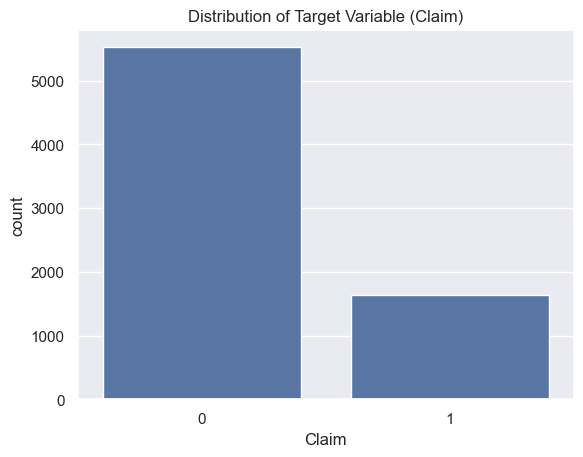

In [12]:
sns.countplot(data=df, x='Claim')
plt.title('Distribution of Target Variable (Claim)')
plt.show()

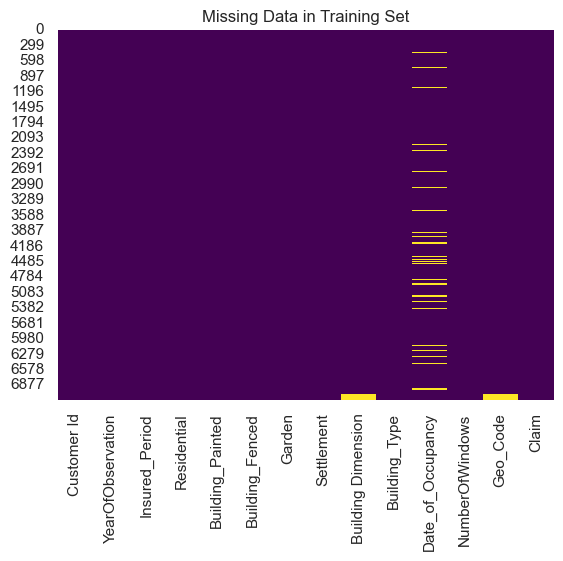

In [13]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Data in Training Set')
plt.show()

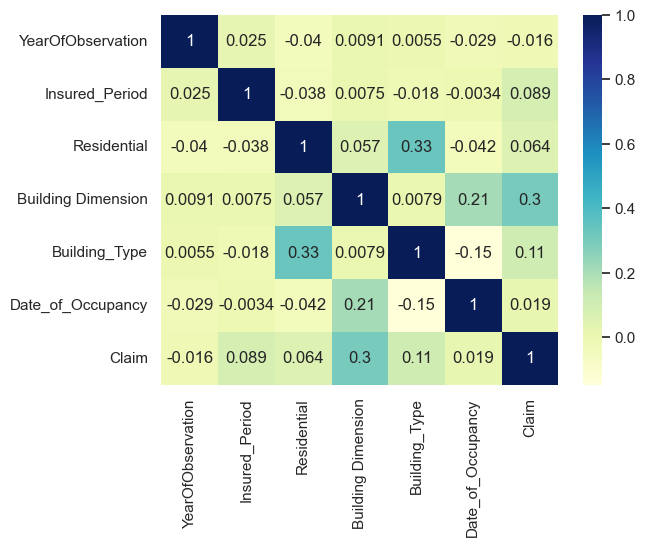

In [14]:
dataplot = sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)

plt.show()

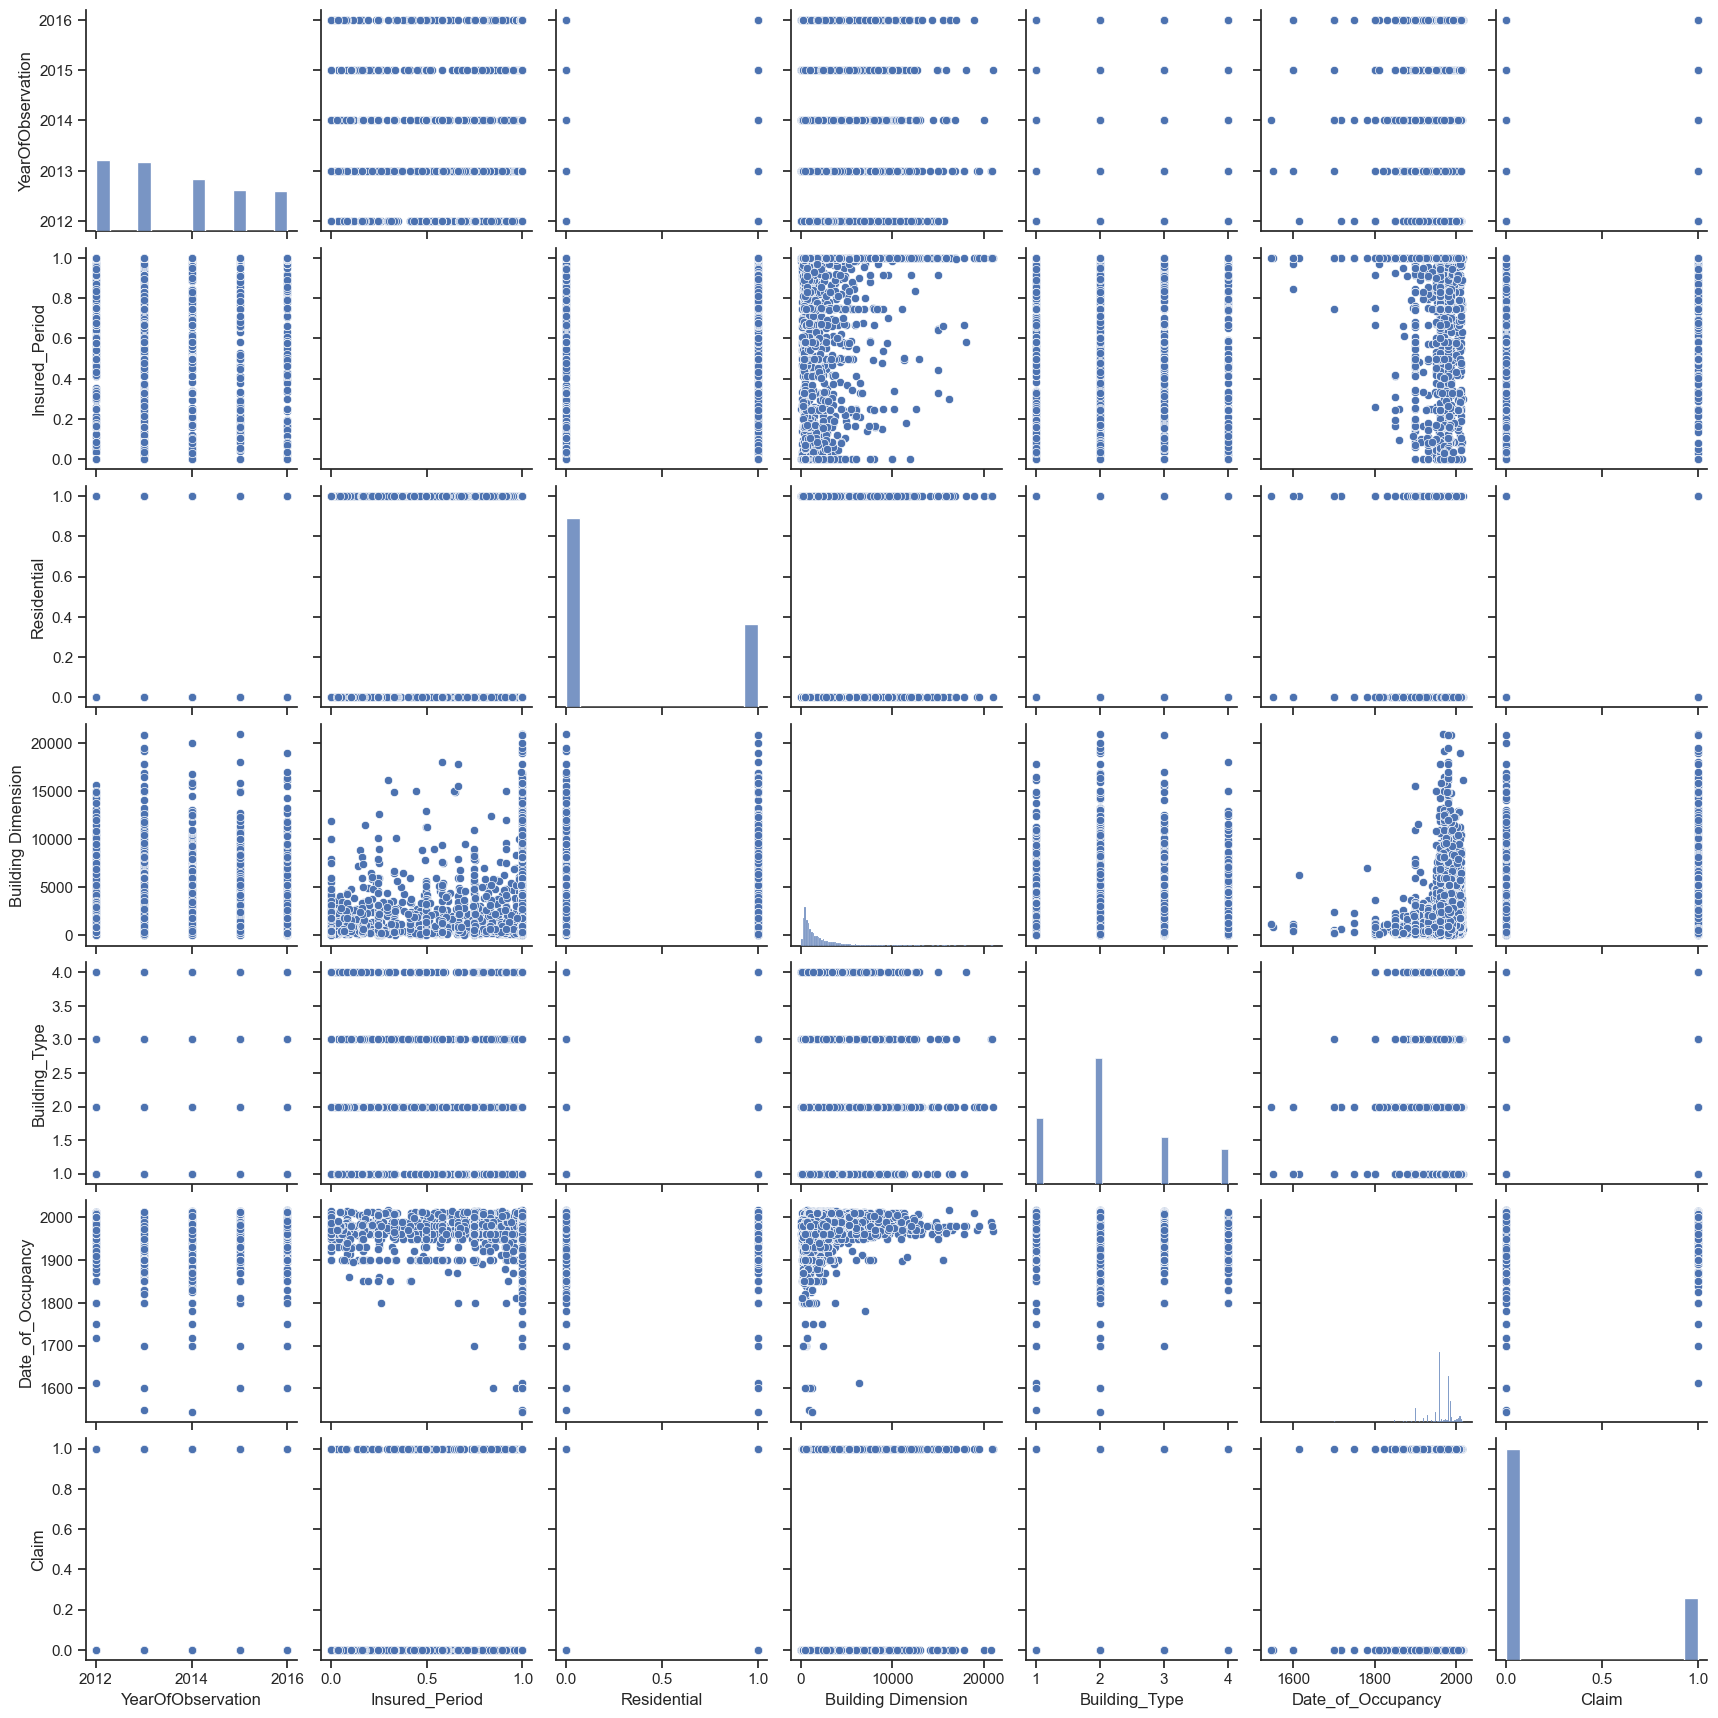

In [15]:
sns.set_theme(style="ticks")
sns.pairplot(df)

In [16]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn import set_config




In [17]:
set_config(display='diagram')


#### Drop non-predictive column 'Customer Id' and target column 'Claim'

In [18]:
X = df.drop(columns=["Customer Id", "Claim"])  

y = df["Claim"]




In [19]:
print(df.columns)

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')


In [20]:
for i in df.columns:
    print(i)
    x = type(df[i][1])
    print(x.__name__)

Customer Id
str
YearOfObservation
int64
Insured_Period
float64
Residential
int64
Building_Painted
str
Building_Fenced
str
Garden
str
Settlement
str
Building Dimension
float64
Building_Type
int64
Date_of_Occupancy
float64
NumberOfWindows
str
Geo_Code
str
Claim
int64


In [21]:
df = df.drop(columns=["Customer Id", "Claim"])


#### define the numberical and categorical columns 

In [22]:
categorical_cols = [x for x in df.columns if type(df[x][1]).__name__ == 'str']


numerical_cols = [x for x in df.columns if type(df[x][1]).__name__ != 'str']




#### Pipeline to clean the data and to also replace the missing value  and also scale the data

In [23]:
categorical_transformer = Pipeline(steps=[

    ("imputer", SimpleImputer(strategy="most_frequent")),

    ("onehot", OneHotEncoder(handle_unknown="ignore"))

])



numerical_transformer = Pipeline(steps=[

    ("imputer", SimpleImputer(strategy="mean")),

    ("scaler", StandardScaler())

])


In [24]:
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [25]:
numerical_transformer

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

##### Combine preprocessors into a column transformer


In [26]:

preprocessor = ColumnTransformer(transformers=[
("num", numerical_transformer, numerical_cols),

    ("cat", categorical_transformer, categorical_cols)

])



In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


#### Pipelines for different models

In [28]:
# Logistic Regression

logistic_pipeline = Pipeline(steps=[

    ("preprocessor", preprocessor),

    ("classifier", LogisticRegression(random_state=42))

])



# Decision Tree

decision_tree_pipeline = Pipeline(steps=[

    ("preprocessor", preprocessor),

    ("classifier", DecisionTreeClassifier(random_state=42))

])



# Random Forest

random_forest_pipeline = Pipeline(steps=[

    ("preprocessor", preprocessor),

    ("classifier", RandomForestClassifier(random_state=42))

])




In [29]:
random_forest_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['YearOfObservation',
                                                   'Insured_Period',
                                                   'Residential',
                                                   'Building Dimension',
                                                   'Building_Type',
                                                   'Date_of_Occupancy']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Building_Painted',
                                                   'Building_Fenced', 'Garden',
                                                   'Settlement',
                                                   'NumberOfWindows',
                                                   'Geo_Code'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [30]:
decision_tree_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['YearOfObservation',
                                                   'Insured_Period',
                                                   'Residential',
                                                   'Building Dimension',
                                                   'Building_Type',
                                                   'Date_of_Occupancy']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Building_Painted',
                                                   'Building_Fenced', 'Garden',
                                                   'Settlement',
                                                   'NumberOfWindows',
                                                   'Geo_Code'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [31]:
logistic_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['YearOfObservation',
                                                   'Insured_Period',
                                                   'Residential',
                                                   'Building Dimension',
                                                   'Building_Type',
                                                   'Date_of_Occupancy']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Building_Painted',
                                                   'Building_Fenced', 'Garden',
                                                   'Settlement',
                                                   'NumberOfWindows',
                                                   'Geo_Code'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [32]:
pipelines = {

    "Logistic Regression": logistic_pipeline,

    "Decision Tree": decision_tree_pipeline,

    "Random Forest": random_forest_pipeline

}


In [33]:
results = {}

for name, pipeline in pipelines.items():

    # Train the model

    pipeline.fit(X_train, y_train)

    

    # Predictions

    y_pred = pipeline.predict(X_test)

    

    # Evaluation

    results[name] = classification_report(y_test, y_pred, output_dict=True)



results



{'Logistic Regression': {'0': {'precision': 0.7987897125567323,
   'recall': 0.9556561085972851,
   'f1-score': 0.8702101359703337,
   'support': 1105.0},
  '1': {'precision': 0.5545454545454546,
   'recall': 0.18654434250764526,
   'f1-score': 0.2791762013729977,
   'support': 327.0},
  'accuracy': 0.7800279329608939,
  'macro avg': {'precision': 0.6766675835510934,
   'recall': 0.5711002255524652,
   'f1-score': 0.5746931686716656,
   'support': 1432.0},
  'weighted avg': {'precision': 0.7430160586672854,
   'recall': 0.7800279329608939,
   'f1-score': 0.7352463813520872,
   'support': 1432.0}},
 'Decision Tree': {'0': {'precision': 0.8023952095808383,
   'recall': 0.848868778280543,
   'f1-score': 0.8249780123131046,
   'support': 1105.0},
  '1': {'precision': 0.3650190114068441,
   'recall': 0.29357798165137616,
   'f1-score': 0.3254237288135593,
   'support': 327.0},
  'accuracy': 0.7220670391061452,
  'macro avg': {'precision': 0.5837071104938412,
   'recall': 0.5712233799659596,

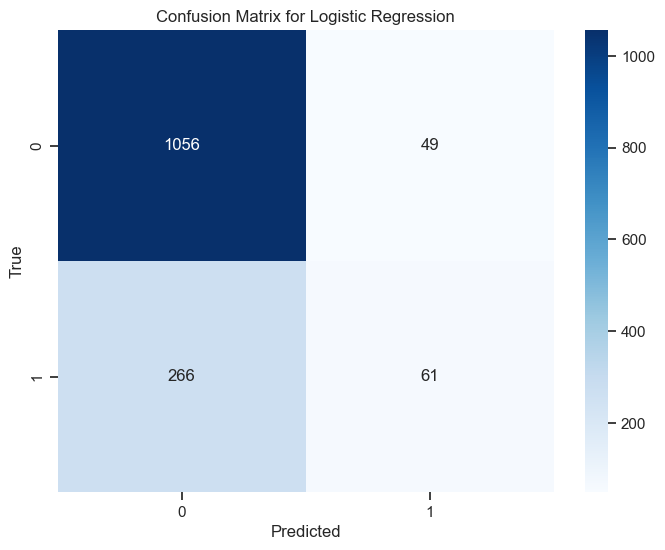

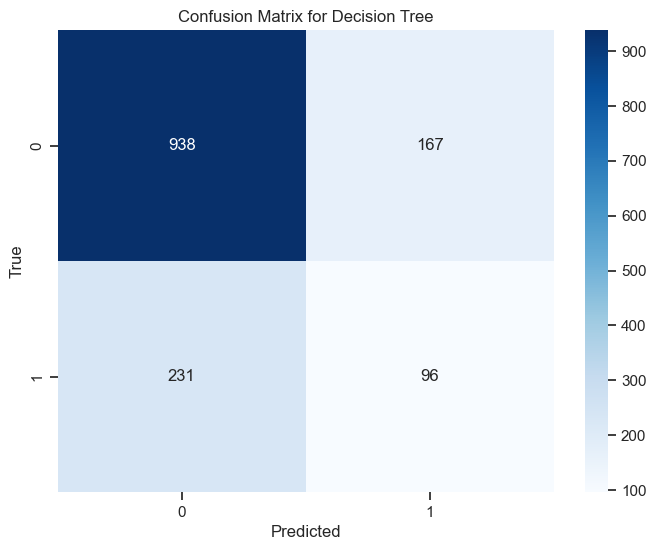

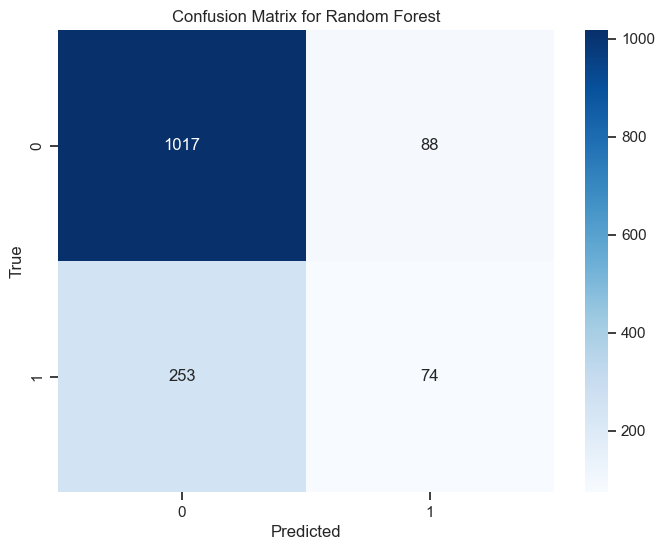

In [34]:


for name, pipeline in pipelines.items():
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)
    
    # Evaluation
    results[name] = classification_report(y_test, y_pred, output_dict=True)
    
    cm = confusion_matrix(y_test, y_pred)
    
    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()



### Insights

- **Logistic Regression**:
  - Achieved the highest recall for Class 0 but struggled with detecting Class 1 (claims).

- **Decision Tree**:
  - Slightly more balanced in detecting claims but has a lower accuracy compared to the other models.

- **Random Forest**:
  - Performed well for Class 0 and has better accuracy and precision for Class 1 than the Decision Tree, though its recall for Class 1 is still low.


the Decision Tree is likely the best choice as it provides a better trade-off between recall and precision.

In [35]:
predictions = {}
test_data = pd.read_csv("test_data.csv")


pre = []
pre = decision_tree_pipeline.predict(test_data)
test_data['clain'] = pre
test_data

predictions_df = test_data[['Customer Id','clain']]

# Save the predictions to a CSV file
predictions_df.to_csv("test_data_predictions.csv", index=False)

# print("Predictions have been made and saved to 'test_data_predictions.csv'.")


In [36]:
predictions_df

,Customer Id,clain
0,H11920,0
1,H11921,0
2,H9805,0
3,H7493,0
4,H7494,0
...,...,...
3064,H11583,0
3065,H11720,0
3066,H11721,1
3067,H12408,0
